<a href="https://colab.research.google.com/github/stav1236/colab-repo/blob/main/logistic_regression/logistic_regression_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/1000 - Loss: 0.6931, Train Acc: 0.9012, Test Acc: 0.8990
Epoch 10/1000 - Loss: 0.5849, Train Acc: 0.9012, Test Acc: 0.8990
Epoch 20/1000 - Loss: 0.5081, Train Acc: 0.9018, Test Acc: 0.9000
Epoch 30/1000 - Loss: 0.4572, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 40/1000 - Loss: 0.4212, Train Acc: 0.9018, Test Acc: 0.9000
Epoch 50/1000 - Loss: 0.3946, Train Acc: 0.9018, Test Acc: 0.9000
Epoch 60/1000 - Loss: 0.3739, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 70/1000 - Loss: 0.3575, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 80/1000 - Loss: 0.3441, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 90/1000 - Loss: 0.3330, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 100/1000 - Loss: 0.3235, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 110/1000 - Loss: 0.3154, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 120/1000 - Loss: 0.3084, Train Acc: 0.9018, Test Acc: 0.9010
Epoch 130/1000 - Loss: 0.3022, Train Acc: 0.9020, Test Acc: 0.9010
Epoch 140/1000 - Loss: 0.2967, Train Acc: 0.9020, Test Acc: 0.9000
Epoch 

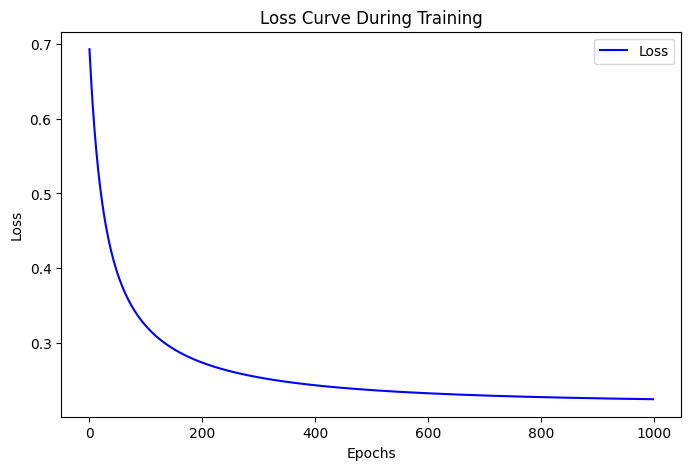

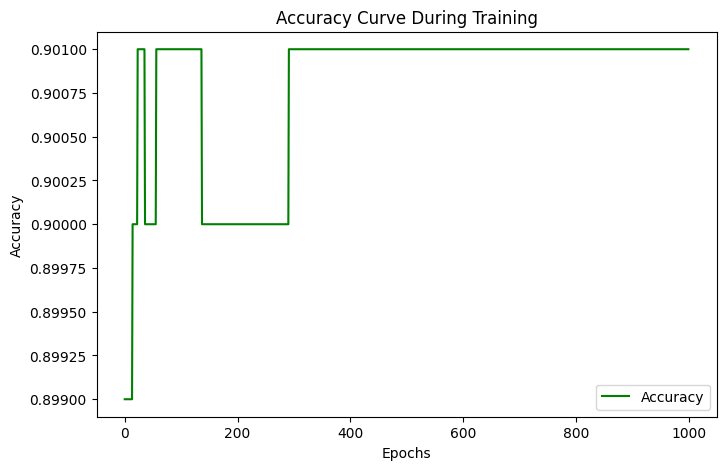


Final Model Equation:
z = -0.5998 * Temperature + 4.0502 * Humidity + -0.2079 * Wind Speed + -1.1151
y' = sigmoid(z)


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/stav1236/colab-repo/main/logistic_regression/datasets/weather_dataset.csv"
df = pd.read_csv(url)

# Extract features and target variable
X = df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)']].values
y = df['Rain'].values.reshape(-1, 1)  # Ensure y is a column vector

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model parameters
def initialize_weights(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute loss and gradients with L2 regularization
def compute_loss_and_gradients(X, y, W, b, lambda_):
    m = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    # Compute loss (binary cross-entropy with L2 regularization)
    loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    reg_term = (lambda_ / (2 * m)) * np.sum(W ** 2)  # L2 regularization term
    loss += reg_term

    # Compute gradients
    dz = y_pred - y
    dW = (1 / m) * np.dot(X.T, dz) + (lambda_ / m) * W  # L2 regularization gradient
    db = (1 / m) * np.sum(dz)

    return loss, dW, db

# Training function with gradient descent
def train_logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.1, epochs=1000, lambda_=0.1):
    n_features = X_train.shape[1]
    W, b = initialize_weights(n_features)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        # Compute loss and gradients using the entire dataset
        loss, dW, db = compute_loss_and_gradients(X_train, y_train, W, b, lambda_)

        # Update weights using the entire dataset
        W -= learning_rate * dW
        b -= learning_rate * db

        # Calculate accuracy for the entire dataset
        y_train_pred = sigmoid(np.dot(X_train, W) + b) >= 0.5
        train_accuracy = np.mean(y_train_pred == y_train)

        y_test_pred = sigmoid(np.dot(X_test, W) + b) >= 0.5
        test_accuracy = np.mean(y_test_pred == y_test)

        # Store loss and accuracy history
        loss_history.append(loss)
        accuracy_history.append(test_accuracy)

        # Print loss and accuracy for each epoch
        if (epoch+1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

    return W, b, loss_history, accuracy_history

# Train model
W_final, b_final, loss_history, accuracy_history = train_logistic_regression(X_train, y_train, X_test, y_test)

# Plot loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(accuracy_history, label='Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve During Training')
plt.legend()
plt.show()

# Print final model equation
print("\nFinal Model Equation:")
print(f"z = {W_final[0][0]:.4f} * Temperature + {W_final[1][0]:.4f} * Humidity + {W_final[2][0]:.4f} * Wind Speed + {b_final:.4f}")
print("y' = sigmoid(z)")
